In [1]:
import cobra
from cobra.io import read_sbml_model
from cobra import Model, Reaction, Metabolite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cobra.flux_analysis import production_envelope

In [3]:
pa = read_sbml_model('../models/pabcb1h.xml')
#cobra.io.save_json_model(pa, '../models/pabcb1h.json')

In [8]:
TCA_rxns = ['PPC','PC','MDH','FUM','SUCD1','FRDx','ACACT1r','OCOAT1','SUCOAACTr']
TCA_genes = []
for r in TCA_rxns:
    TCA_genes.append(pa.reactions.get_by_id(r).gene_reaction_rule)
TCA_genes

['assembly_00756',
 'assembly_00504',
 'assembly_00173',
 'assembly_00398',
 'assembly_00686',
 'assembly_01673',
 'assembly_01011',
 '',
 '']

In [10]:
pa.reactions.get_by_id('3OXCOAT')

Reaction identifier,3OXCOAT
Name,3-oxoadipyl-CoA thiolase
Memory address,0x07fbe1d3d6bb0
Stoichiometry,coa_c + oxadpcoa_c --> accoa_c + succoa_c Coenzyme A + 3-Oxoadipyl-CoA --> Acetyl-CoA + Succinyl-CoA
GPR,assembly_01011
Lower bound,0.0
Upper bound,1000.0


In [9]:
pa.metabolites.succoa_c

Metabolite identifier,succoa_c
Name,Succinyl-CoA
Memory address,0x07fbe1d601b80
Formula,C25H35N7O19P3S
Compartment,C_c
In 6 reaction(s),"THDPS, OCOAT1, BSCT, SUCOAACTr, 3OXCOAT, 3OADPCOAT"


 if list(DMEM['rxn'])[i] not in ['EX_h2s(e)','EX_pydxn(e)', 'EX_mqn7(e)', 'EX_pheme(e)',
                                    'EX_sheme(e)','EX_arabinogal(e)','EX_mqn8(e)','EX_q8(e)']:

In [8]:
DMEM = pd.read_csv('DMEM6429_medium.csv')
DMEM_medium = {}
for i in range(len(DMEM['rxn'])):
    if list(DMEM['rxn'])[i] not in ['EX_arabinogal(e)']:
        DMEM_medium[list(DMEM['rxn'])[i]] = list(DMEM['flux'])[i]
print(DMEM_medium)

{'EX_ala_L(e)': 1.0, 'EX_arg_L(e)': 1.0, 'EX_asn_L(e)': 1.0, 'EX_asp_L(e)': 1.0, 'EX_cys_L(e)': 1.0, 'EX_gln_L(e)': 1.0, 'EX_glu_L(e)': 1.0, 'EX_gly(e)': 1.0, 'EX_his_L(e)': 1.0, 'EX_ile_L(e)': 1.0, 'EX_leu_L(e)': 1.0, 'EX_lys_L(e)': 1.0, 'EX_met_L(e)': 1.0, 'EX_phe_L(e)': 1.0, 'EX_pro_L(e)': 1.0, 'EX_ser_L(e)': 1.0, 'EX_thr_L(e)': 1.0, 'EX_trp_L(e)': 1.0, 'EX_tyr_L(e)': 1.0, 'EX_val_L(e)': 1.0, 'EX_glc_D(e)': 4.5, 'EX_pyr(e)': 1.0, 'EX_ca2(e)': 1.0, 'EX_chol(e)': 1.0, 'EX_cl(e)': 1.0, 'EX_cobalt2(e)': 1.0, 'EX_cu2(e)': 1.0, 'EX_fe2(e)': 1.0, 'EX_fe3(e)': 1.0, 'EX_fol(e)': 1.0, 'EX_k(e)': 1.0, 'EX_h2o(e)': 10.0, 'EX_h2s(e)': 1.0, 'EX_inost(e)': 1.0, 'EX_mg2(e)': 1.0, 'EX_mn2(e)': 1.0, 'EX_ncam(e)': 1.0, 'EX_pi(e)': 10.0, 'EX_pnto_R(e)': 1.0, 'EX_pydxn(e)': 1.0, 'EX_ribflv(e)': 1.0, 'EX_so4(e)': 1.0, 'EX_thm(e)': 1.0, 'EX_zn2(e)': 1.0, 'EX_mqn7(e)': 1.0, 'EX_mqn8(e)': 1.0, 'EX_pheme(e)': 1.0, 'EX_q8(e)': 1.0, 'EX_sheme(e)': 1.0}


In [74]:
# medium_id = ['DMEM' for i in range(49)]
# description = ['DMEM' for i in range(49) ]
# compound = ['ala__L', 'arg__L', 'asn__L', 'asp__L', 'cys__L', 'gln__L', 'glu__L','gly', 'his__L', 'ile__L',
#             'leu__L', 'lys__L', 'met__L', 'phe__L','pro__L', 'ser__L', 'thr__L', 'trp__L', 'tyr__L', 'val__L', 'glc__D',
#             'pyr', 'ca2', 'chol', 'cl', 'cobalt2', 'cu2', 'fe2', 'fe3','fol', 'k', 'h2o', 'h2s', 'inost', 'mg2', 'mn2',
#             'ncam','pi', 'pnto_R', 'pydxn', 'ribflv', 'so4', 'thm', 'zn2', 'mqn7','mqn8', 'pheme', 'q8', 'sheme']
# name = []
# for c in compound:
#     if pa.metabolites.query(c) == []:
#         name.append(c)
#     else:
#         name.append(pa.metabolites.query(c)[0].name)
# name[-1] = 'Siroheme C42H36FeN4O16'

# db_table = pd.DataFrame(zip(medium_id,description,compound,name),
#                         columns = ['medium','description','compound','name'])
# db_table.to_csv('DMEM_db.tsv',sep='\t',index=None)

In [14]:
DMEM_medium

{'EX_ala_L(e)': 1.0,
 'EX_arg_L(e)': 1.0,
 'EX_asn_L(e)': 1.0,
 'EX_asp_L(e)': 1.0,
 'EX_cys_L(e)': 1.0,
 'EX_gln_L(e)': 1.0,
 'EX_glu_L(e)': 1.0,
 'EX_gly(e)': 1.0,
 'EX_his_L(e)': 1.0,
 'EX_ile_L(e)': 1.0,
 'EX_leu_L(e)': 1.0,
 'EX_lys_L(e)': 1.0,
 'EX_met_L(e)': 1.0,
 'EX_phe_L(e)': 1.0,
 'EX_pro_L(e)': 1.0,
 'EX_ser_L(e)': 1.0,
 'EX_thr_L(e)': 1.0,
 'EX_trp_L(e)': 1.0,
 'EX_tyr_L(e)': 1.0,
 'EX_val_L(e)': 1.0,
 'EX_glc_D(e)': 4.5,
 'EX_pyr(e)': 1.0,
 'EX_ca2(e)': 1.0,
 'EX_chol(e)': 1.0,
 'EX_cl(e)': 1.0,
 'EX_cobalt2(e)': 1.0,
 'EX_cu2(e)': 1.0,
 'EX_fe2(e)': 1.0,
 'EX_fe3(e)': 1.0,
 'EX_fol(e)': 1.0,
 'EX_k(e)': 1.0,
 'EX_h2o(e)': 10.0,
 'EX_h2s(e)': 1.0,
 'EX_inost(e)': 1.0,
 'EX_mg2(e)': 1.0,
 'EX_mn2(e)': 1.0,
 'EX_ncam(e)': 1.0,
 'EX_pi(e)': 10.0,
 'EX_pnto_R(e)': 1.0,
 'EX_pydxn(e)': 1.0,
 'EX_ribflv(e)': 1.0,
 'EX_so4(e)': 1.0,
 'EX_thm(e)': 1.0,
 'EX_zn2(e)': 1.0,
 'EX_mqn7(e)': 1.0,
 'EX_mqn8(e)': 1.0,
 'EX_pheme(e)': 1.0,
 'EX_q8(e)': 1.0,
 'EX_sheme(e)': 1.0}

In [9]:
#ncam,pheme,pnto_R
#pydxn,
# DMEM_M = {'EX_ala__L_e': 1.0, 'EX_arg__L_e': 1.0, 'EX_asn__L_e': 1.0, 'EX_asp__L_e': 1.0, 'EX_cys__L_e': 1.0,
#           'EX_gln__L_e': 1.0, 'EX_glu__L_e': 1.0, 'EX_gly_e': 1.0, 'EX_his__L_e': 1.0, 'EX_ile__L_e': 1.0, 
#           'EX_leu__L_e': 1.0, 'EX_lys__L_e': 1.0, 'EX_met__L_e': 1.0, 'EX_phe__L_e': 1.0, 'EX_pro__L_e': 1.0,
#           'EX_ser__L_e': 1.0, 'EX_thr__L_e': 1.0, 'EX_trp__L_e': 1.0, 'EX_tyr__L_e': 1.0, 'EX_val__L_e': 1.0,
#           'EX_glc__D_e': 4.5, 'EX_pyr_e': 1.0, 'EX_ca2_e': 1.0, 'EX_chol_e': 1.0, 'EX_cl_e': 1.0, 'EX_cobalt2_e': 1.0,
#           'EX_cu2_e': 1.0, 'EX_fe2_e': 1.0, 'EX_fe3_e': 1.0, 'EX_fol_e': 1.0, 'EX_k_e': 1.0, 'EX_h2o_e': 10.0,
#           'EX_h2s_e': 1.0, 'EX_inost_e': 1.0, 'EX_mg2_e': 1.0, 'EX_mn2_e': 1.0, 'EX_ncam_e': 1.0, 'EX_pi_e': 10.0,
#           'EX_ribflv_e': 1.0, 'EX_so4_e': 1.0, 'EX_thm_e': 1.0, 'EX_zn2_e': 1.0,'EX_pheme_e': 1.0}

In [10]:
# DMEM_rich_M = {}
# for ex in DMEM_M.keys():
#     DMEM_rich_M[ex] = 1000

In [5]:
#add reactions
# ncam_e = Metabolite('ncam_e',formula='C6H6N2O',name='Nicotinamide',compartment='C_e')
# pheme_e = Metabolite('pheme_e',formula='C34H30FeN4O4',name = 'Protoheme C34H30FeN4O4',compartment='C_e')
# pa.add_metabolites([ncam_e,pheme_e])
# EX_na1_e = Reaction('EX_na1_e','R_EX_na1_e','',-1000.,1000.)
# EX_ni2_e = Reaction('EX_ni2_e','R_EX_ni2_e','',-1000.,1000.)
# NCAMUP = Reaction(id='NCAMUP',name='Nicotinamide acid uptake', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
# PHEMEt = Reaction(id='PHEMEt',name='Heme transport', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
# EX_ncam_e = Reaction(id='EX_ncam_e',name='EX_ncam_e', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
# EX_pheme_e = Reaction(id='EX_pheme_e',name='EX_pheme_e', subsystem='', lower_bound=-1000.0, upper_bound=1000.0)
# pa.add_reactions([EX_na1_e,EX_ni2_e,NCAMUP,PHEMEt,EX_ncam_e,EX_pheme_e])
# EX_ni2_e.build_reaction_from_string('ni2_e <=> ')
# EX_na1_e.build_reaction_from_string('na1_e <=> ')
# NCAMUP.build_reaction_from_string('ncam_e <=> ncam_c')
# PHEMEt.build_reaction_from_string('pheme_e <=> pheme_c')
# EX_ncam_e.build_reaction_from_string('ncam_e <=> ')
# EX_pheme_e.build_reaction_from_string('pheme_e <=> ')

# simulation

In [30]:
# with pa:
#     temp_M = DMEM_M.copy()
#     pa.medium = temp_M
    
#     print(pa.slim_optimize())
    
# with pa:
#     temp_M = DMEM_rich_M.copy()
#     pa.medium = temp_M
#     print(pa.slim_optimize())
with pa:
    print(pa.slim_optimize())
    temp = pa.medium
    temp['EX_o2_e'] = 0
    pa.medium = temp
    print(pa.slim_optimize())

36.9421023710234
19.302404084785806


# PedA synthesis

In [7]:
# pediocin PA-1
aa_freq = {}
pedA_seq = 'KYYGNGVTCGKHSCSVDWGKATTCIINNGAMAWATGGHQGNHKC'
for a in pedA_seq:
    if a in aa_freq:
        aa_freq[a] += 1
    else:
        aa_freq[a] = 1
print(aa_freq)
    
atp_num = len(pedA_seq)*4.306
print(atp_num)

{'K': 4, 'Y': 2, 'G': 8, 'N': 4, 'V': 2, 'T': 4, 'C': 4, 'H': 3, 'S': 2, 'D': 1, 'W': 2, 'A': 4, 'I': 2, 'M': 1, 'Q': 1}
189.464


In [8]:
aa_names = {'A':'ala__L_c', 'C':'cys__L_c', 'D':'asp__L_c', 'E':'glu__L_c', 'F':'phe__L_c', 'G':'gly_c',
            'H':'his__L_c', 'I':'ile__L_c', 'K':'lys__L_c', 'L':'leu__L_c', 'M':'met__L_c', 'N':'asn__L_c',
            'P':'pro__L_c','Q':'gln__L_c', 'R':'arg__L_c', 'S':'ser__L_c', 'T':'thr__L_c', 'V':'val__L_c',
            'W':'trp__L_c', 'Y':'tyr__L_c'}

pedA_c = Metabolite('pedA_c',formula='C196H293N61O60S5',name='Pediocin PA-1',compartment='C_c')
pedA_e = Metabolite('pedA_e',formula='C196H293N61O60S5',name='Pediocin PA-1',compartment='C_e')
pa.add_metabolites([pedA_c,pedA_e])
#pediocin synthesis
PedA_synthesis = Reaction('PedA_synthesis','Pediocin PA-1 synthesis','',0,1000)
PedA_synthesis_rxn = ''
for aa in aa_freq:
    PedA_synthesis_rxn = PedA_synthesis_rxn + str(float(aa_freq[aa])) + ' ' + aa_names[aa] + ' + '
PedA_synthesis_rxn =(  PedA_synthesis_rxn + 
    '189.464 atp_c + 146.464 h2o_c --> 189.464 adp_c + 189.464 pi_c + pedA_c + 189.464 h_c' )
    
print(PedA_synthesis_rxn)
#pediocin export: c->e and exchange
PedAabc = Reaction('PedAabc')
PedAabc.name = 'Pediocin PA-1 export via ABC system'
PedAabc.subsystem = ''
PedAabc.lower_bound = 0
PedAabc.upper_bound = 1000.
PedAabc.gene_reaction_rule = ''
PedAabc_rxn = 'pedA_c + atp_c + h2o_c --> pedA_e + adp_c + pi_c + h_c '
EX_pedA_e = Reaction('EX_pedA_e')
EX_pedA_e.name = 'R_EX_pedA_e'
EX_pedA_e.subsystem = ''
EX_pedA_e.lower_bound = -1000.
EX_pedA_e.upper_bound = 1000.
EX_pedA_e.gene_reaction_rule = ''
EX_pedA_e_rxn = 'pedA_e <=> '
pa.add_reactions([PedA_synthesis,PedAabc,EX_pedA_e])
PedA_synthesis.build_reaction_from_string(PedA_synthesis_rxn)
PedAabc.build_reaction_from_string(PedAabc_rxn)
EX_pedA_e.build_reaction_from_string(EX_pedA_e_rxn)

4.0 lys__L_c + 2.0 tyr__L_c + 8.0 gly_c + 4.0 asn__L_c + 2.0 val__L_c + 4.0 thr__L_c + 4.0 cys__L_c + 3.0 his__L_c + 2.0 ser__L_c + 1.0 asp__L_c + 2.0 trp__L_c + 4.0 ala__L_c + 2.0 ile__L_c + 1.0 met__L_c + 1.0 gln__L_c + 189.464 atp_c + 146.464 h2o_c --> 189.464 adp_c + 189.464 pi_c + pedA_c + 189.464 h_c


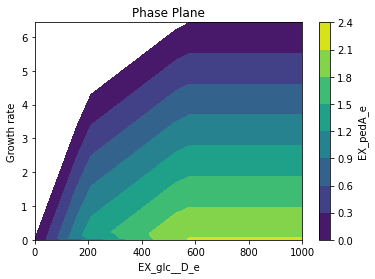

In [15]:
with pa:
    temp_M = DMEM_rich_M.copy()
    pa.medium = temp_M
    result = production_envelope(pa, ["EX_pedA_e", "EX_glc__D_e"])
    result = result[result['flux_maximum'].notna()]
    plt.tricontourf( -np.array(list(result['EX_glc__D_e']) ) , list(result['flux_maximum']), 
                list(result['EX_pedA_e']) )
    cbar = plt.colorbar();
    cbar.set_label('EX_pedA_e')
    plt.xlabel('EX_glc__D_e')
    plt.ylabel('Growth rate')
    plt.title('Phase Plane')